In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
import string

In [2]:
!pip install wordcloud

                                              0.0/299.9 kB ? eta -:--:--
     ------------                           102.4/299.9 kB 3.0 MB/s eta 0:00:01
     -------------------------------------- 299.9/299.9 kB 3.7 MB/s eta 0:00:00


In [4]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sarab\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [45]:
df = pd.read_csv("lyrics_202505062303.csv")

In [46]:
df.head()

,musicbrainz_id,genius_lyrics,genius_url,lastfm_wiki_summary,lastfm_wiki_content
0,00b1397d-7f3e-4c59-bb42-ccd7fa17ee10,94 Contributors\nTranslations\nPolski\nEspañol...,https://genius.com/Ariana-grande-raindrops-an-...,"""Raindrops (An Angel Cried)"" (stylized in all ...","""Raindrops (An Angel Cried)"" (stylized in all ..."
1,00c9dcab-4abf-47f5-9755-c5c805b779c7,275 Contributors\nTranslations\nPortuguês\nРус...,https://genius.com/Kanye-west-through-the-wire...,"""Through the Wire"" is the lead single from Ka...","""Through the Wire"" is the lead single from Ka..."
2,012e3459-b54d-49e9-b48d-d0922d295c5a,31 Contributors\nI’ll Cry Instead Lyrics\nJohn...,https://genius.com/The-beatles-ill-cry-instead...,NaN,NaN
3,013a7fe3-0113-4604-a295-f74a0b88bf05,37 Contributors\nShe’s Always a Woman Lyrics\n...,https://genius.com/Billy-joel-shes-always-a-wo...,"""She's Always a Woman"" is a She's Always a Wom...","""She's Always a Woman"" is a She's Always a Wom..."
4,01564f1c-99b2-466a-a60d-4e22a5008525,15 Contributors\n​angel Lyrics\n[Verse 1]\nIf ...,https://genius.com/Kacey-musgraves-angel-lyrics,NaN,NaN


In [47]:
# Use the correct lyrics column
LYRICS_COL = 'genius_lyrics'

In [48]:
# Drop rows with missing lyrics
df = df.dropna(subset=[LYRICS_COL])

In [49]:
def clean_explicit_words(text):
    if not isinstance(text, str):
        return ""
    return (text.replace("nigger", "n***a")
                .replace("nigga", "n***a")
                .replace("fuck", "f***")
                .replace("shit", "s***")
                .replace("bitch", "b****"))

In [50]:
def compute_metrics(text):
    if isinstance(text, str) and text.strip():
        num_sent = len(sent_tokenize(text))
        words = word_tokenize(text)
        avg_word_len = sum(len(w) for w in words) / len(words) if words else 0
        return num_sent, avg_word_len
    return 0, 0

In [51]:
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=900, height=450, background_color='white', colormap='plasma').generate(text)
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title, fontsize=16)
    plt.show()

📊 Overall Dataset Analysis:
Average number of sentences per lyric: 5529.00
Average word length: 3.30


C:\Users\sarab\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


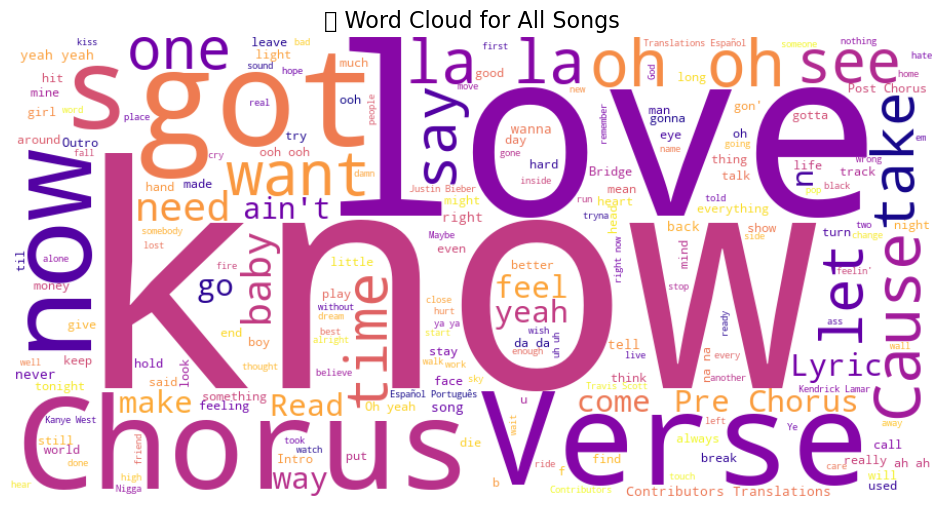

In [52]:
# Overall Analysis

df[LYRICS_COL + '_cleaned'] = df[LYRICS_COL].apply(clean_explicit_words)

all_lyrics = " ".join(df[LYRICS_COL + '_cleaned'].dropna())
avg_sent_all, avg_wlen_all = compute_metrics(all_lyrics)

print("📊 Overall Dataset Analysis:")
print(f"Average number of sentences per lyric: {avg_sent_all:.2f}")
print(f"Average word length: {avg_wlen_all:.2f}")
generate_wordcloud(all_lyrics, "🌍 Word Cloud for All Songs")


🎶 Individual Song Analysis:

🎵 Follow Your Arrow by Kacey Musgraves
→ Sentences         : 1
→ Average Word Length : 3.57
→ Genius URL        : https://genius.com/Kacey-musgraves-follow-your-arrow-lyrics
→ Last.fm Summary   : ''Follow Your Arrow" is the third single of Kacey's album, "Same Trailer Different Park". When talking about the song, Kacey says: "I feel like country music has kind of wrapped their arms around me a



C:\Users\sarab\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127912 (\N{ARTIST PALETTE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


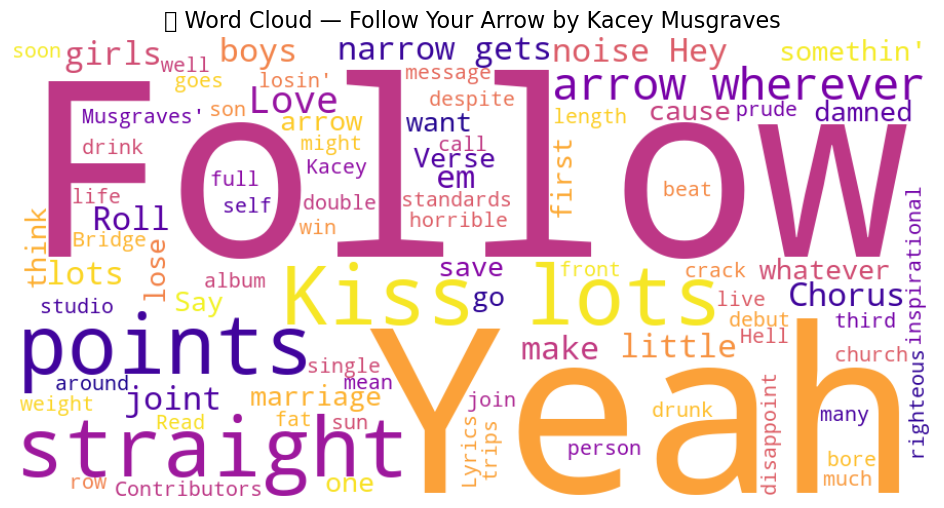

🎵 Anna (Go to Him) by The Beatles
→ Sentences         : 3
→ Average Word Length : 3.25
→ Genius URL        : https://genius.com/The-beatles-anna-go-to-him-lyrics
→ Last.fm Summary   : "Anna (Go to Him)", or simply "Anna", is a song written and originally recorded by Arthur Alexander. A cover version was performed by  The Beatles  and included on their 1963 debut album  Please Pleas



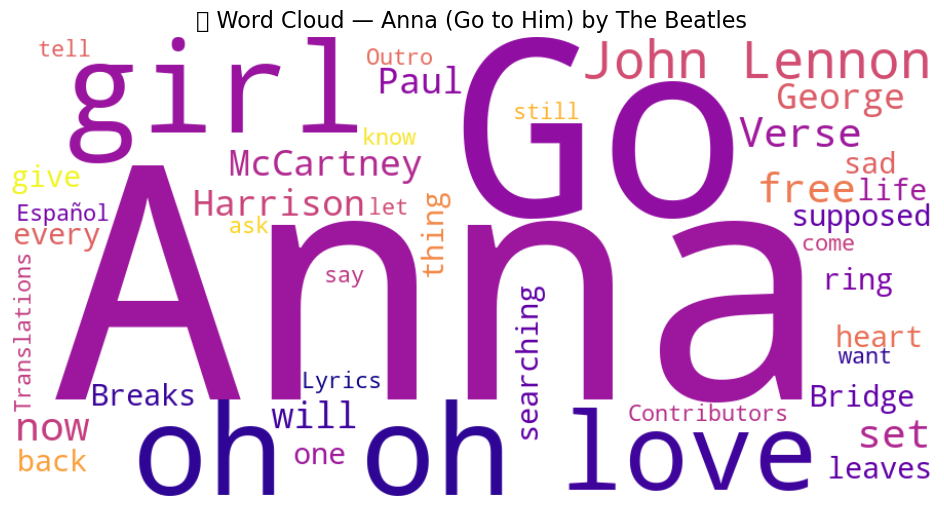

🎵 Memory Box by Peter Cat Recording Co.
→ Sentences         : 2
→ Average Word Length : 3.23
→ Genius URL        : https://genius.com/Peter-cat-recording-co-memory-box-lyrics
→ Last.fm Summary   : "Memory Box" is by far the most pop-oriented song on Bismillah, with swelling violins, a very lively and surprisingly detailed percussion section, a contagious tune, and a fast tempo. This song is abo



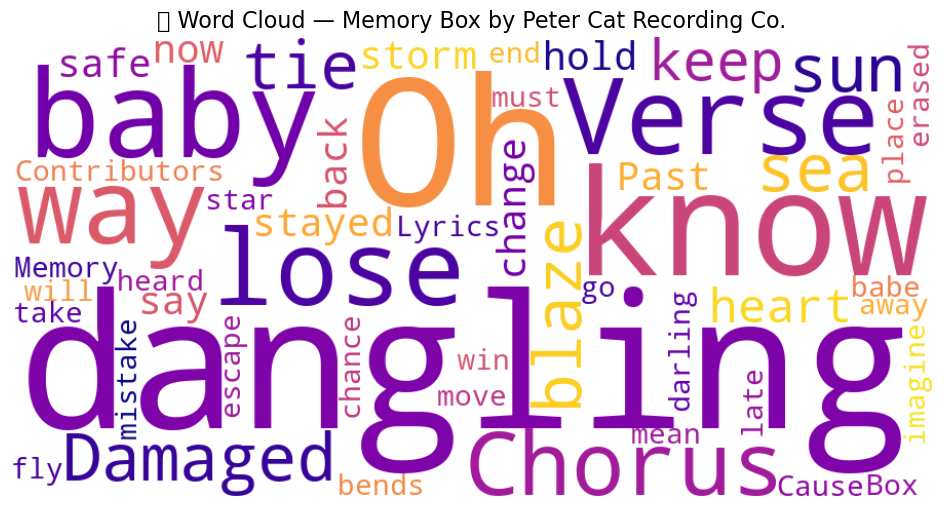

In [53]:
# ✅ Analysis for 3 Selected Songs

song_info = {
    "a31eab71-a326-4a2e-abc0-3233a1f534e5": ("Anna (Go to Him)", "The Beatles"),
    "b7b3dde7-c246-4add-9300-f6e25b1365cf": ("Memory Box", "Peter Cat Recording Co."),
    "4abb7b36-39a8-4984-a77f-7de0e375f36b": ("Follow Your Arrow", "Kacey Musgraves"),
}

df_selected = df[df["musicbrainz_id"].isin(song_info.keys())]

print("\n🎶 Individual Song Analysis:\n")

for _, row in df_selected.iterrows():
    song_id = row["musicbrainz_id"]
    title, artist = song_info.get(song_id, ("Unknown Title", "Unknown Artist"))
    lyrics = clean_explicit_words(row[LYRICS_COL])
    
    num_sent, avg_word_len = compute_metrics(lyrics)
    
    print(f"🎵 {title} by {artist}")
    print(f"→ Sentences         : {num_sent}")
    print(f"→ Average Word Length : {avg_word_len:.2f}")
    print(f"→ Genius URL        : {row['genius_url']}")
    print(f"→ Last.fm Summary   : {row['lastfm_wiki_summary'][:200] if pd.notnull(row['lastfm_wiki_summary']) else 'N/A'}\n")
    
    generate_wordcloud(lyrics, f"🎨 Word Cloud — {title} by {artist}")